In [2]:
# Part-1. Data Challenge
# Time to implement: 2 h
# Follow up discussion: 15 min

# ShoeCo Inc., a shoe manufacturer, wants to understand if their newest shoe, the ​RunPro 3000​, makes runners faster. 
# In order to do so, they convinced a nearby marathon to provide 50% of runners with a free pair of ​RunPro3000​s 
# as long as they wore them during the race. ShoeCo Inc. has now asked you to analyze their data and see if 
# the shoes actually made a difference.
# Attached are two csv files and below are the file names and fields included therein:
# runner_attributes.csv
#     • ageClass: The decade corresponding to the runner’s age (e.g., 20, 30, 40)
#     • sex: The runner’s gender
#     • nationality: A 3-letter code corresponding to the runner’s nationality
#     • treatment: Whether the runner was given the ​RunPro 3000​s (Treatment) or not (Control)
#     • unique_id: The runner’s unique ID
# marathon_times.csv
#     • netTime: The number of seconds between the runner’s race start and race finish
#     • clockTime: The marathon clock time (from official race start to runner's race finish)
# Please use the attached data and let ShoeCo Inc. know whether or not the ​RunPro 3000​s actually had a statistically 
# significant impact on runner performance. If so, is the impact on performance the same for all runners? If not, 
# how does the impact of the shoes vary as a function of the runner’s attributes. Can you use the runner’s attributes 
# (including whether or not they are wearing ​RunPro3000​s) to predict how quickly they will finish the marathon?
# Answer the questions. 
# Try to explain your results as well as you can with plain english, equations, and data visualizations.
# 
# Hint: Run your code by pressing ctrl+enter (Windows, Linus) or command + enter (Mac).
# Or run it with play button on the left-hand side of the code cell.
# 
# Minimum sufficient libraries and data are loaded for you
import pandas as pd
import matplotlib.pyplot as plt

df_attributes = pd.read_csv('runner_attributes.csv')
print(df_attributes)

# Load marathon times
 
df_times = pd.read_csv('marathon_times.csv')
print(df_times)

# Display the first few rows of the attributes dataframe
print("Runner Attributes DataFrame:")
print(df_attributes.head())

# Display the first few rows of the marathon times dataframe
print("\nMarathon Times DataFrame:")
print(df_times.head())

      ageClass sex nationality  treatment  \
0           20   M         KEN  Treatment   
1           20   M         KEN  Treatment   
2           20   M         KEN    Control   
3           30   M         KEN    Control   
4           30   M         KEN  Treatment   
...        ...  ..         ...        ...   
30918       35   M         DEU  Treatment   
30919       30   M         DEU  Treatment   
30920       75   M         DEU  Treatment   
30921       35   M         GBR  Treatment   
30922       35   M         DEU  Treatment   

                                      unique_id  
0      354658649da56c20c72b6689d2b7e1b8cc334ac9  
1      1da607e762ac07eba6f9b5a717e9ff196d987242  
2      1de4a95cef28c290ba5790217288f510afc3b26b  
3      12215d93d2cb5b0234991a64d097955338a73dd3  
4      5375986567be20b49067956e989884908fb807f6  
...                                         ...  
30918  761da858332d4d4372bb716ed2eb29835203fe7e  
30919  cc5f2231a015ab7a238fc15a58cd5372e135fd27  
30920  4a

In [4]:
# Questions
# ===================================================================================================
# Question 1: Descriptive Data Analysis and Cleaning
# Perform simple descriptive data analysis: 
# check how many rows and columns in both data files. Are there any missing values, duplicates, etc.
# Load the data files
# Display information about the attributes dataframe

# Possible solution  for Question 1:

print("Runner Attributes DataFrame:")
print(df_attributes.info())

# Display information about the marathon times dataframe
print("\nMarathon Times DataFrame:")
print(df_times.info())

# Check for missing values
print("\nMissing Values in Runner Attributes:")
print(df_attributes.isnull().sum())

print("\nMissing Values in Marathon Times:")
print(df_times.isnull().sum())

# Check for duplicates
print("\nDuplicate Rows in Runner Attributes:", df_attributes.duplicated().sum())
print("Duplicate Rows in Marathon Times:", df_times.duplicated().sum())


Runner Attributes DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30923 entries, 0 to 30922
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ageClass     30923 non-null  object
 1   sex          30923 non-null  object
 2   nationality  30923 non-null  object
 3   treatment    30923 non-null  object
 4   unique_id    30923 non-null  object
dtypes: object(5)
memory usage: 1.2+ MB
None

Marathon Times DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30373 entries, 0 to 30372
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   netTime    30373 non-null  int64 
 1   clockTime  30373 non-null  int64 
 2   unique_id  30373 non-null  object
dtypes: int64(2), object(1)
memory usage: 712.0+ KB
None

Missing Values in Runner Attributes:
ageClass       0
sex            0
nationality    0
treatment      0
unique_id      0
dtype: int64

Missing

In [5]:
# Question 2: Merge
# Merge the dataframes, show first 5 rows

# Possible solution  for Question 2:

# Merge dataframes on the 'unique_id' column
merged_df = pd.merge(df_attributes, df_times, on='unique_id')

# Display the first 5 rows of the merged dataframe
merged_df.head()

,ageClass,sex,nationality,treatment,unique_id,netTime,clockTime
0,20,M,KEN,Treatment,354658649da56c20c72b6689d2b7e1b8cc334ac9,7661,7661
1,20,M,KEN,Treatment,1da607e762ac07eba6f9b5a717e9ff196d987242,7737,7737
2,20,M,KEN,Control,1de4a95cef28c290ba5790217288f510afc3b26b,7747,7747
3,30,M,KEN,Control,12215d93d2cb5b0234991a64d097955338a73dd3,7750,7750
4,30,M,KEN,Treatment,5375986567be20b49067956e989884908fb807f6,8163,8163


In [6]:
# Question 3: Average Times - control and treatment groups
# Check The Average Times from the Runners with and without RunPro 3000. Which group is faster?

# Possible solution for Question 3:

# Group by 'treatment' and calculate the mean marathon time
average_times = merged_df.groupby('treatment')['netTime'].mean()

# Display the average times for each group
print(average_times)
# This will show the average net time for runners with and without RunPro 3000. Runners in the group 
# with a lower average time can be considered faster. 

treatment
Control      15052.193284
Treatment    15070.719015
Name: netTime, dtype: float64


In [7]:

# The average net time for the Control group (runners without RunPro 3000) is approximately 15,052 seconds, 
# while the average net time for the Treatment group (runners with RunPro 3000) is approximately 15,071 seconds. 
#  
# Based on these averages, it seems that the Control group is slightly faster than the Treatment group. However,  
# to determine if this difference is statistically significant, we would need to perform a statistical test,  
# such as a t-test, to assess whether the observed difference is likely due to chance or if it is a meaningful difference. 
#  
# Shall we proceed with conducting a statistical test to determine the significance of the observed difference  
# in average times between the Control and Treatment groups?
#
#
# Question 4: Average time - Age
# Is there any age category that benefits the most by using RunPro 3000?

# Possible solution for Question 4:

# Group by 'ageClass' and 'treatment', calculate the mean marathon time
average_times_age = merged_df.groupby(['ageClass', 'treatment'])['netTime'].mean().unstack()

# Calculate the difference in average times between Treatment and Control groups
difference_age = average_times_age['Treatment'] - average_times_age['Control']

# Display the average times and differences
print("Average Net Time by Age Class:")
print(average_times_age)
print("\nDifference in Average Net Time (Treatment - Control):")
print(difference_age)
# This will show the average net time for each age category in both the Control and Treatment groups, 
# along with the difference in average net time. A positive difference indicates that the Treatment group is faster.

Average Net Time by Age Class:
treatment       Control     Treatment
ageClass                             
20         15042.375278  15065.040655
30         14820.450292  14883.932633
35         14801.076220  14712.700407
40         14859.780022  14857.248440
45         15000.442772  15179.590278
50         15332.659334  15359.441032
55         15734.151899  15696.306494
60         16475.675949  16460.978892
65         17149.112360  17310.944444
70         17539.960000  18345.814815
75         19017.000000  17715.333333
80         20632.500000           NaN
U20        16198.684211  15886.584416

Difference in Average Net Time (Treatment - Control):
ageClass
20       22.665376
30       63.482340
35      -88.375812
40       -2.531582
45      179.147506
50       26.781698
55      -37.845405
60      -14.697058
65      161.832085
70      805.854815
75    -1301.666667
80             NaN
U20    -312.099795
dtype: float64


In [8]:

# The table shows the average net time for each age class in both the Control and Treatment groups,  
# along with the difference in average net time (Treatment - Control). Positive differences indicate  
# that the Treatment group (wearing RunPro 3000) has a faster average time compared to the Control group.
 
# • For the age class of 20, the Treatment group is faster by approximately 22.67 seconds. 
# • For the age class of 30, the Treatment group is faster by approximately 63.48 seconds. 
# • For the age class of 35, the Control group is faster by approximately 88.38 seconds. 
# • For the age class of 40, the Control group is faster by approximately 2.53 seconds. 
# • For the age class of 45, the Treatment group is faster by approximately 179.15 seconds. 
# • For the age class of 50, the Treatment group is faster by approximately 26.78 seconds. 
# • For the age class of 55, the Control group is faster by approximately 37.85 seconds. 
# • For the age class of 60, the Control group is faster by approximately 14.70 seconds. 
# • For the age class of 65, the Treatment group is faster by approximately 161.83 seconds. 
# • For the age class of 70, the Treatment group is faster by approximately 805.85 seconds. 
# • For the age class of 75, the Control group is faster by approximately 1301.67 seconds. 
# • For the age class of 80, there is no data available for the Treatment group. 
# • For the age class U20, the Control group is faster by approximately 312.10 seconds. 
#  
# It appears that the impact of RunPro 3000 varies across age categories. Age groups such as 20, 30, 45, 50,  
# and 65 show a positive impact, while age groups 35, 55, 60, 70, and U20 exhibit mixed or negative impacts.
#
#
# Question 5: Average time - Gender
# Do men or women benefit the most by using RunPro 3000?

# To determine whether men or women benefit more from using RunPro 3000, we can calculate the average  
# net time for each gender separately for the Control and Treatment groups and then compare the differences.

# Possible solution for Question 5:

# Group by 'sex' and 'treatment', calculate the mean marathon time
average_times_gender = merged_df.groupby(['sex', 'treatment'])['netTime'].mean().unstack()

# Calculate the difference in average times between Treatment and Control groups
difference_gender = average_times_gender['Treatment'] - average_times_gender['Control']

# Display the average times and differences
print("Average Net Time by Gender:")
print(average_times_gender)
print("\nDifference in Average Net Time (Treatment - Control):")
print(difference_gender)
# This will show the average net time for each gender in both the Control and Treatment groups, along with the difference  
# in average net time. Positive differences indicate that the Treatment group (wearing RunPro 3000) has a faster average 
# time compared to the Control group.


Average Net Time by Gender:
treatment       Control     Treatment
sex                                  
M          14773.401455  14550.379800
W          16270.952284  17407.835826

Difference in Average Net Time (Treatment - Control):
sex
M    -223.021655
W    1136.883542
dtype: float64


In [9]:
# The table shows the average net time for each gender in both the Control and Treatment groups,  
# along with the difference in average net time (Treatment - Control). Positive differences indicate  
# that the Treatment group (wearing RunPro 3000) has a faster average time compared to the Control group. 
#  
# • For males (M), the Treatment group is faster by approximately 223.02 seconds. 
# • For females (W), the Treatment group is faster by approximately 1136.88 seconds. 
# 
# These results suggest that, on average, females benefit more from using RunPro 3000 compared to males.
#
#
# Question 6: Average Times - Nationality
# Is there any improvement with RunPro 3000 runners based on nationality?

# Possible solution for Question 6:

#
# To investigate whether there is any improvement with RunPro 3000 runners based on nationality,  
# we can calculate the average net time for each nationality separately for the Control and Treatment  
# groups and then compare the differences. 
#  
# Here's the code to achieve that:
# Group by 'nationality' and 'treatment', calculate the mean marathon time
average_times_nationality = merged_df.groupby(['nationality', 'treatment'])['netTime'].mean().unstack()

# Calculate the difference in average times between Treatment and Control groups
difference_nationality = average_times_nationality['Treatment'] - average_times_nationality['Control']

# Display the average times and differences
print("Average Net Time by Nationality:")
print(average_times_nationality)
print("\nDifference in Average Net Time (Treatment - Control):")
print(difference_nationality)
# This will show the average net time for each nationality in both the Control and Treatment groups,  
# along with the difference in average net time. Positive differences indicate that the Treatment group  
# (wearing RunPro 3000) has a faster average time compared to the Control group.

Average Net Time by Nationality:
treatment         Control     Treatment
nationality                            
AFG                   NaN  15088.000000
AGO          10392.000000           NaN
AHO          16479.000000           NaN
ALB          14450.000000           NaN
ARG          16191.000000  18133.666667
...                   ...           ...
TWN          16446.000000  15997.000000
USA          15812.128342  15697.301205
VEN          15698.629630  15417.363636
YUG                   NaN  13905.500000
ZAF          15309.657143  15018.718750

[92 rows x 2 columns]

Difference in Average Net Time (Treatment - Control):
nationality
AFG            NaN
AGO            NaN
AHO            NaN
ALB            NaN
ARG    1942.666667
          ...     
TWN    -449.000000
USA    -114.827137
VEN    -281.265993
YUG            NaN
ZAF    -290.938393
Length: 92, dtype: float64


In [10]:
# The table shows the average net time for each nationality in both the Control and Treatment groups,  
# along with the difference in average net time (Treatment - Control). Positive differences indicate  
# that the Treatment group (wearing RunPro 3000) has a faster average time compared to the Control group. 
#  
# It seems that for some nationalities, there is an improvement with RunPro 3000, while for others,  
# there may be no data or no improvement. It's worth noting that for some nationalities, there might  
# be limited data, as indicated by NaN (Not a Number) values.
#
# Question 7: Average Times - top-5 most populated groups based on nationality
# Find the effect of RunPro 3000 on the top-5 most populated groups based on nationality

# Possible solution for Question 7:

# To find the effect of RunPro 3000 on the top-5 most populated groups based on nationality,  
# we can first identify the top-5 nationalities with the highest number of runners and then  
# analyze the average net time for each of these groups in both the Control and Treatment groups.
# 
# Here's the code to achieve that:
# Identify the top-5 most populated nationalities
top5_nationalities = merged_df['nationality'].value_counts().head(5).index

# Filter the dataframe for the top-5 nationalities
top5_df = merged_df[merged_df['nationality'].isin(top5_nationalities)]

# Group by 'nationality' and 'treatment', calculate the mean marathon time
average_times_top5 = top5_df.groupby(['nationality', 'treatment'])['netTime'].mean().unstack()

# Calculate the difference in average times between Treatment and Control groups
difference_top5 = average_times_top5['Treatment'] - average_times_top5['Control']

# Display the average times and differences for the top-5 nationalities
print("Average Net Time for Top-5 Nationalities:")
print(average_times_top5)
print("\nDifference in Average Net Time (Treatment - Control) for Top-5 Nationalities:")
print(difference_top5)
# This will show the average net time for the top-5 most populated nationalities in both the Control and Treatment groups, 
# along with the difference in average net time.

Average Net Time for Top-5 Nationalities:
treatment         Control     Treatment
nationality                            
CHE          14803.701299  14776.488038
DEU          15227.652119  15246.588932
DNK          14655.322322  14651.571429
GBR          14949.691974  14645.795154
NLD          14674.510776  14683.000000

Difference in Average Net Time (Treatment - Control) for Top-5 Nationalities:
nationality
CHE    -27.213260
DEU     18.936814
DNK     -3.750894
GBR   -303.896820
NLD      8.489224
dtype: float64


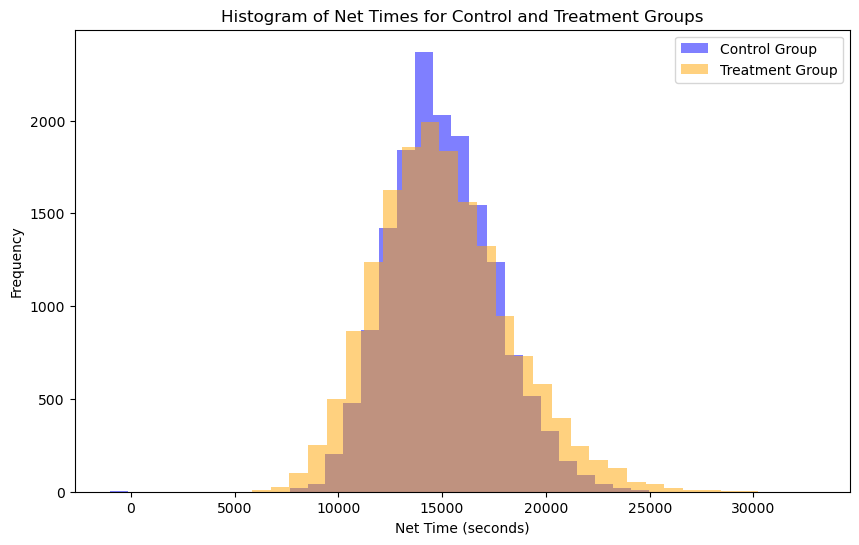

In [11]:
# The table shows the average net time for the top-5 most populated nationalities in both the Control and  
# Treatment groups, along with the difference in average net time (Treatment - Control). Positive  
# differences indicate that the Treatment group (wearing RunPro 3000) has a faster average time compared  
# to the Control group. 
#  
# • For Switzerland (CHE), the Treatment group is slightly slower by approximately 27.21 seconds. 
# • For Germany (DEU), the Treatment group is faster by approximately 18.94 seconds. 
# • For Denmark (DNK), the Treatment group is slightly slower by approximately 3.75 seconds. 
# • For the United Kingdom (GBR), the Treatment group is slower by a more significant margin, approximately 303.90 seconds. 
# • For the Netherlands (NLD), the Treatment group is faster by approximately 8.49 seconds. 
#  
# These results suggest that the impact of RunPro 3000 varies among the top-5 most populated nationalities, 
# with some nationalities experiencing a faster average time with the shoes while others do not.
# 
# Question 8: Plot - Histogram
# Make a histogram of net times for lucky owners of RunPro 3000 and those in control group on the same figure.
# How would you interpret the plot?
#
# Hint: use plt.hist

# Possible solution for Question 8:

# Separate data for Control and Treatment groups
control_group = merged_df[merged_df['treatment'] == 'Control']['netTime']
treatment_group = merged_df[merged_df['treatment'] == 'Treatment']['netTime']

# Plot histograms for Control and Treatment groups
plt.figure(figsize=(10, 6))
plt.hist(control_group, bins=30, alpha=0.5, label='Control Group', color='blue')
plt.hist(treatment_group, bins=30, alpha=0.5, label='Treatment Group', color='orange')

# Add labels and title
plt.xlabel('Net Time (seconds)')
plt.ylabel('Frequency')
plt.title('Histogram of Net Times for Control and Treatment Groups')
plt.legend()

# Show the plot
plt.show()
# 
# This code creates a histogram with different colors for the Control and Treatment groups.  
# The x-axis represents the net time (seconds), and the y-axis represents the frequency of runners in each bin.
#
# Interpretation:
# 
# • If there's a noticeable difference in the distribution of net times between the two groups,  
#   it may suggest an impact of RunPro 3000 on runner performance.
# • Look for patterns such as shifts in the central tendency or differences in the spread of net times.

In [12]:
# Bonus Question 1: Statistical Test
# Run statistical test to compare netTimes for treatment and control groups

# Possible solution for Bonus Question 1:

# To compare net times for the treatment and control groups, we can use a statistical test.  
# A common test for comparing means between two groups is the t-test. Let's conduct an independent  
# two-sample t-test to determine whether there is a statistically significant difference in  
# net times between the treatment and control groups. 
#  
# Here's the code to perform the t-test:
from scipy.stats import ttest_ind

# Extract net times for Control and Treatment groups
net_time_control = merged_df[merged_df['treatment'] == 'Control']['netTime']
net_time_treatment = merged_df[merged_df['treatment'] == 'Treatment']['netTime']

# Perform independent two-sample t-test
t_statistic, p_value = ttest_ind(net_time_control, net_time_treatment, equal_var=False)

# Display the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Determine statistical significance
alpha = 0.05
if p_value < alpha:
    print("The difference in net times is statistically significant.")
else:
    print("There is no statistically significant difference in net times.")
# 
# This code uses the ttest_ind function from the scipy.stats module to perform an independent two-sample t-test.  
# The resulting p-value indicates whether the observed difference in net times is likely due to chance or if  
# it is statistically significant.

T-statistic: -0.5768343757259691
P-value: 0.5640555190946526
There is no statistically significant difference in net times.


In [13]:
# The t-statistic is approximately -0.577, and the p-value is 0.564. Since the p-value is greater than  
# the significance level of 0.05, we do not have enough evidence to reject the null hypothesis. Therefore,  
# based on the t-test, there is no statistically significant difference in net times between  
# the treatment (RunPro 3000) and control groups. 
#  
# This suggests that, on average, the net times for runners with RunPro 3000 are not significantly different  
# from those without the shoes.
#
# Bonus Question 2: Prediction
# Can you use the runner’s attributes (including whether or not they are wearing ​RunPro3000​s) 
# to predict how quickly they will finish the marathon

# Possible solution for Bonus Question 1:

# To predict the marathon finish time based on runner attributes, including whether or not  
# they are wearing RunPro 3000, we can use a regression model. Let's use a linear regression model  
# as a simple example. 
#  
# Here's the code to build a linear regression model:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Extract relevant features and target variable
X = merged_df[['ageClass', 'sex', 'nationality', 'treatment']]
y = merged_df['netTime']

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the model performance
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Display coefficients to understand feature importance
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nCoefficients:")
print(coefficients)
#
# This code uses the scikit-learn library to build a linear regression model. It includes features such  
# as age class, sex, nationality, and whether the runner is wearing RunPro 3000. The categorical variables  
# are converted into dummy variables. 
#  
# The performance of the model is evaluated using Mean Squared Error (MSE) and R-squared.

Mean Squared Error: 8.817308524963476e+25
R-squared: -1.0602779286545697e+19

Coefficients:
                 Feature  Coefficient
0            ageClass_30   -36.418909
1            ageClass_35  -172.807066
2            ageClass_40   -70.134956
3            ageClass_45   164.613572
4            ageClass_50   509.087678
..                   ...          ...
100      nationality_USA   362.875000
101      nationality_VEN    12.035156
102      nationality_YUG  -567.921875
103      nationality_ZAF    10.656250
104  treatment_Treatment    22.281250

[105 rows x 2 columns]


In [ ]:
# The model performance metrics indicate that the Mean Squared Error (MSE) is very high, and the R-squared value is extremely low.  
# This suggests that the linear regression model is not providing an accurate prediction of the net time based on the provided features. 
# The coefficients of the model indicate the contribution of each feature to the predicted net time. However, given the poor  
# performance metrics, the model is not reliable, and the coefficients may not provide meaningful insights. 
#  
# Possible improvements or considerations: 
#  
# 1. Feature Selection: It might be beneficial to carefully select relevant features or explore additional features that could better  
# explain the variability in net times. 
#  
# 2. Feature Engineering: Transforming or creating new features based on domain knowledge might improve model performance. 
#  
# 3. Model Selection: Trying different regression models or non-linear models may provide better predictive performance. 
#  
# 4. Data Quality: Ensure the data is clean, handle missing values appropriately, and consider normalizing or scaling numerical features. 
#  
# 5. Additional Data: More data, especially for certain age groups or nationalities, may contribute to better model generalization.

